In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('C:\\Users\\abdir\\AppData\\Local\\Programs\\Python\\Python312\\kddcup99_csv.csv')

In [ ]:
data.head()

In [9]:
data.shape

(494020, 42)

In [10]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [13]:
input_cols = list(data.columns)[1:-1]
target_col = 'label'
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()[:-1]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[numeric_cols])
data[numeric_cols] = scaler.transform(data[numeric_cols])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target = data['label']
data['label'] = le.fit_transform(target)
data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
print(train_data.shape)
print(test_data.shape)

(345814, 42)
(148206, 42)


In [18]:
train_inputs = train_data[input_cols].copy()
train_targets = train_data[target_col].copy()
test_inputs = test_data[input_cols].copy()
test_targets = test_data[target_col].copy()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 5, random_state=42))
sel.fit(train_inputs, train_targets)
selected_feat = train_inputs.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

Index(['protocol_type', 'service', 'srv_count', 'diff_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate'],
      dtype='object')
6


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf.fit(train_inputs[selected_feat], train_targets)

preds_rf = rf.predict(test_inputs[selected_feat])

score_rf = accuracy_score(test_targets, preds_rf)

print("Random Forest Accuracy Score:", score_rf)


Random Forest Accuracy Score: 0.9936439820250192


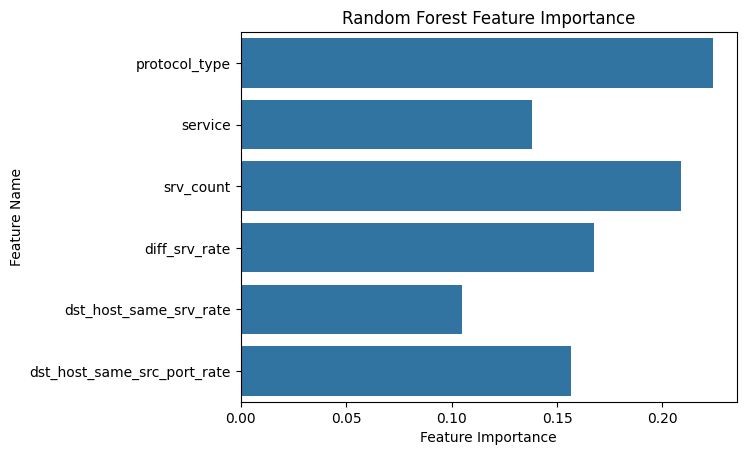

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot
feature_importances = rf.feature_importances_
feature_names = train_inputs[selected_feat].columns
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

# Confusion Matrix

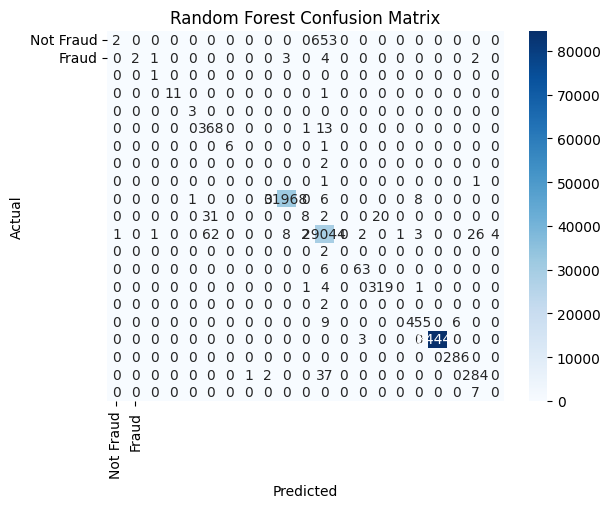

In [39]:
cm = confusion_matrix(test_targets, preds_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_inputs[selected_feat], train_targets);
preds_dc = dc.predict(test_inputs[selected_feat])
score_dc = accuracy_score(test_targets, preds_dc)
score_dc
print("Decision Tree Accuracy Score:", score_dc)


Decision Tree Accuracy Score: 0.9934685505310177


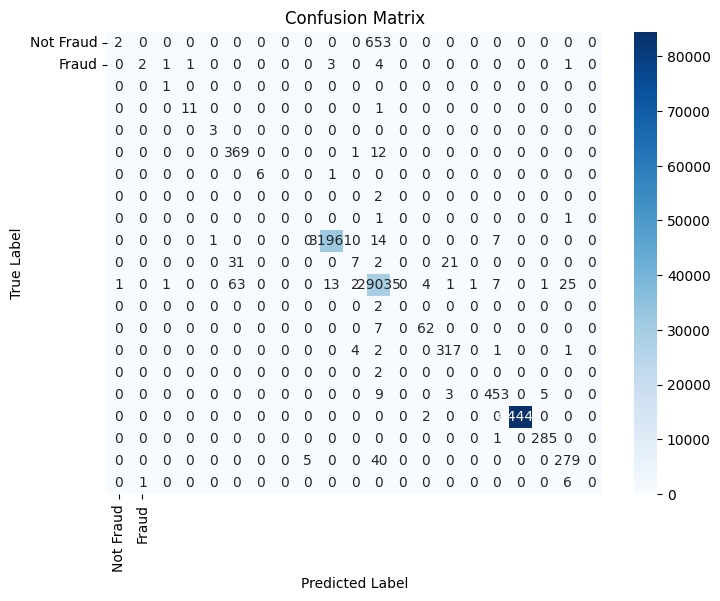

In [36]:
# Create a confusion matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(test_targets, preds_dc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming train_inputs, train_targets, test_inputs, and test_targets are properly defined

# Create an SVM classifier
svm_classifier = SVC(random_state=42)


# Fit the SVM model
svm_classifier.fit(train_inputs[selected_feat], train_targets)

# Make predictions
preds_svm = svm_classifier.predict(test_inputs[selected_feat])

# Calculate accuracy score
score_svm = accuracy_score(test_targets, preds_svm)

# Print the accuracy score
print("SVM Accuracy Score:", score_svm)


SVM Accuracy Score: 0.9812423248721375


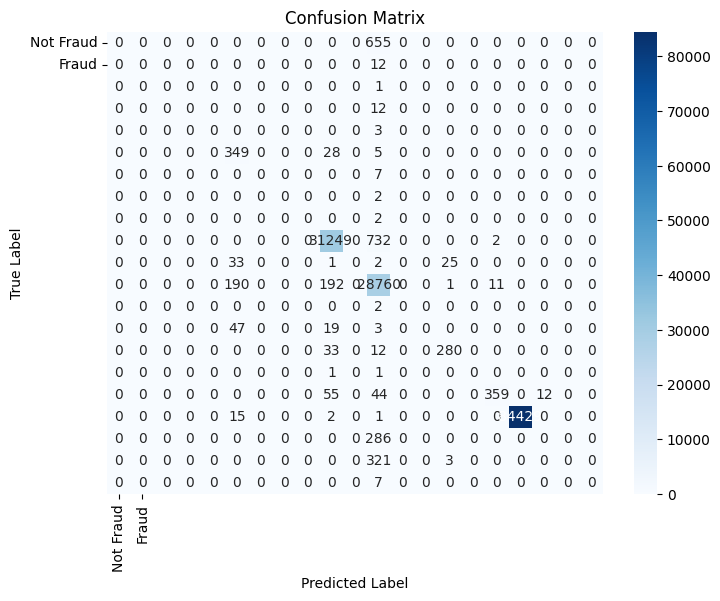

In [35]:
# Create a confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(test_targets, preds_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()